# Lab 4. Análisis de datos y ajuste de curvas.ipynb

Cristian Yesid Dulcey Perez.    
Cod. 160003407   
Email. cristian.dulcey@unillanos.edu.co  

## Actividad

**1. Realice las gráficas de:**
- a. Correlaciones de retraso estimadas (Estimated lag correlations)
- b. Diagráma de dispersión (Scatter diagram)
- c. Histogramas de cantidad de eventos (llegadas)

**2. Calcule los estadísticos de:**

- a. Media
- b. Desviación Estándar
- c. Mediana
- d. Mínimo
- e. Máximo

**3.**

Entre 5 posibles distribuciones de probabilidad de su elección, realice el ajuste de curvas calculando un criterio de selección y graficándolas  (empírica vs teóricas), con la respectiva estimación de parámetros.

In [70]:
# Librerias
# ==============================================================================

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from matplotlib import style

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

# Configuración matplotlib
# ==============================================================================
#plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# import tqdm

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### 1. Realice las gráficas de:

- a. Correlaciones de retraso estimadas (Estimated lag correlations)
- b. Diagráma de dispersión (Scatter diagram)
- c. Histogramas de cantidad de eventos (llegadas)

In [71]:
url1 = 'https://raw.githubusercontent.com/cristdulcey/simulacion/master/dataset-A.txt'
datasetA = pd.read_csv(url1, sep=" ", header=None)
datasetA = datasetA.to_numpy()
url2 = 'https://raw.githubusercontent.com/cristdulcey/simulacion/master/dataset-B.txt'
datasetB = pd.read_csv(url2, header=None) 
datasetB = datasetB.to_numpy()
url3 = 'https://raw.githubusercontent.com/cristdulcey/simulacion/master/dataset-C.txt'
datasetC = pd.read_csv(url3, header=None) 
datasetC = datasetC.to_numpy()
url4 = 'https://raw.githubusercontent.com/cristdulcey/simulacion/master/dataset-D.txt'
datasetD = pd.read_csv(url4, header=None)
datasetD = datasetD.to_numpy()

In [72]:
# a. Correlaciones de retraso estimadas (Estimated lag correlations)
def est_lag_crt(data, _lags, title):
  fig = tsaplots.plot_acf(data, lags=_lags, zero=False)

  plt.title("Autocorrelation of Dataset " + title)
  plt.xlabel("Lag at k")
  plt.ylabel("Correlation")
  plt.yticks([-1,0.05,1])
  plt.show();
  print("\n")

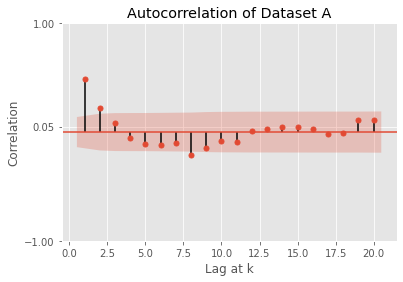

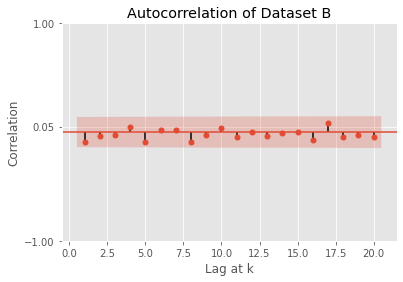

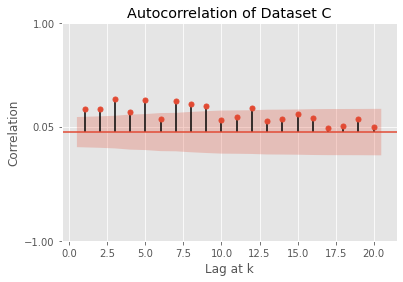

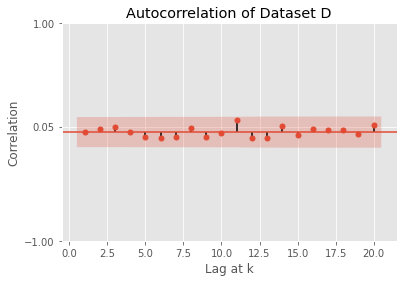

In [73]:
est_lag_crt(datasetA, 20, "A")
est_lag_crt(datasetB, 20, "B")
est_lag_crt(datasetC, 20, "C")
est_lag_crt(datasetD, 20, "D")

In [74]:
# b. Diagráma de dispersión (Scatter diagram)
def scatter_diagram(data, title):
  plt.title("Diagráma de dispersión (Scatter diagram) Dataset" + title)
  plt.xlabel("Observation [k]")
  plt.ylabel("Observation [k+1]")

  # plt.plot(data, 'r.')
  # plt.xlim(0, len(datasetA))
  # plt.ylim(1, len(datasetA))
  x = data[0:len(data)-1]
  y = data[1:len(data)]
  plt.scatter(x,y)
  plt.show()
  print("\n")

In [75]:
# c. Histogramas de cantidad de eventos (llegadas)
def plot_histograma(datos, title):
  # Gráficos distribución observada (empírica)
  # ==============================================================================
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

  # Histograma
  axs[0].hist(x=datos, bins=30, color="#3182bd", alpha=0.5)
  axs[0].plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
  axs[0].set_title('Distribución empírica ' + title)
  axs[0].set_xlabel('datos')
  axs[0].set_ylabel('counts')

  # Función de Distribución Acumulada
  # ecdf (empirical cumulative distribution function)
  datos = np.transpose(datos)
  ecdf = ECDF(x=datos[0])
  axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
  axs[1].set_title('Función de distribución empírica ' + title)
  axs[1].set_xlabel('precio')
  axs[1].set_ylabel('CDF')

  plt.tight_layout();

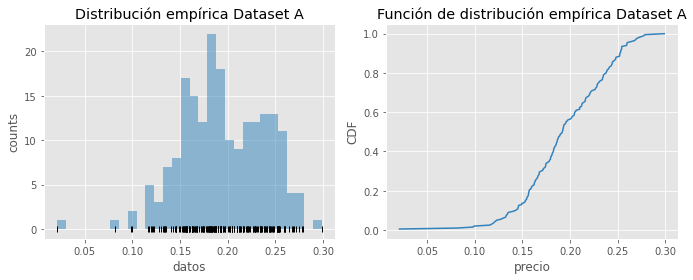

In [76]:
plot_histograma(datasetA, "Dataset A")

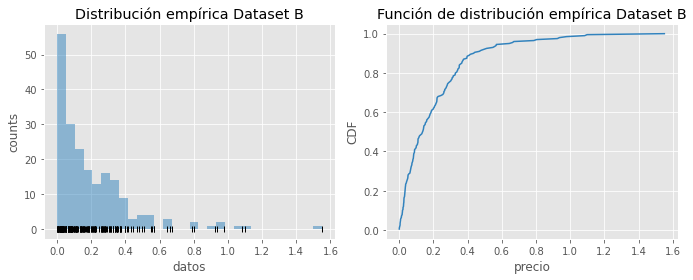

In [77]:
plot_histograma(datasetB, "Dataset B")

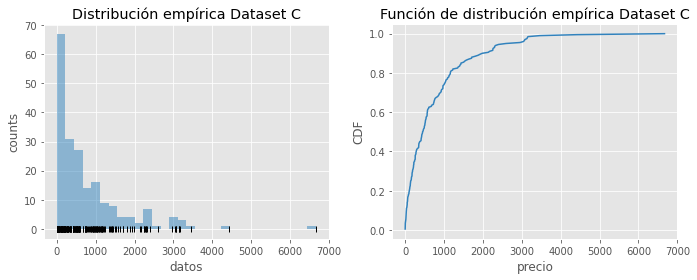

In [78]:
plot_histograma(datasetC, "Dataset C")

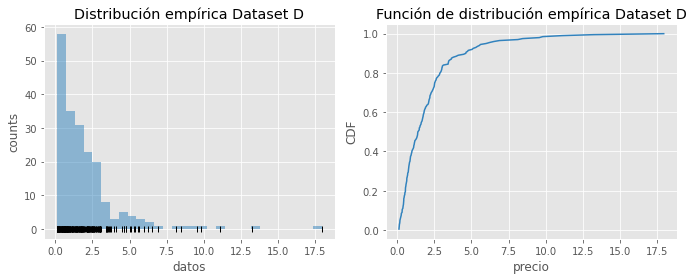

In [79]:
plot_histograma(datasetD, "Dataset D")

### 2. Calcule los estadísticos de

- a. Media
- b. Desviación Estándar
- c. Mediana
- d. Mínimo
- e. Máximo

In [80]:
def statistics(data):
  mean = np.mean(data)
  std = np.std(data)
  median = np.median(data)
  min = np.ndarray.min(data)
  max = np.ndarray.max(data)
  return (mean, std, median, min, max)

In [81]:
datasets_all = [datasetA,datasetB,datasetC,datasetD]
letters = ['A','B','C','D']
for dataset_aux in range(0,4):
  mean, std, median, min, max = statistics(datasets_all[dataset_aux])
  print(f"Estadisticas de Dataset {letters[dataset_aux]} \nMedia: \t {mean} \nDesviación Estándar:\t{std} \nMediana:\t{median} \nMínimo:\t{min} \nMáximo:\t{max}\n") 

Estadisticas de Dataset A 
Media: 	 0.19503882325 
Desviación Estándar:	0.04370009475299661 
Mediana:	0.19207359 
Mínimo:	0.02096387 
Máximo:	0.29896589

Estadisticas de Dataset B 
Media: 	 0.2053932905 
Desviación Estándar:	0.22851326031300284 
Mediana:	0.13767570499999998 
Mínimo:	8.516e-05 
Máximo:	1.5513065

Estadisticas de Dataset C 
Media: 	 762.3938363989308 
Desviación Estándar:	920.8196428534683 
Mediana:	455.5575633661065 
Mínimo:	0.926680792592622 
Máximo:	6669.853056571353

Estadisticas de Dataset D 
Media: 	 2.0604977596655094 
Desviación Estándar:	2.3207585536929196 
Mediana:	1.4063560945736469 
Mínimo:	0.1115049959249003 
Máximo:	17.96703215358073



### 3.

Entre 5 posibles distribuciones de probabilidad de su elección, realice el ajuste de curvas calculando un criterio de selección y graficándolas  (empírica vs teóricas), con la respectiva estimación de parámetros.

In [90]:
def seleccionar_distribuciones(familia='realall', verbose=True):
    '''
    Esta función selecciona un subconjunto de las distribuciones disponibles
    en scipy.stats
    
    Parameters
    ----------
    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas
        
    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).
        
    Returns
    -------
    distribuciones: list
        listado con las distribuciones (los objetos) seleccionados.
        
    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.
        
    Notes
    -----
        Las distribuciones levy_stable y vonmises han sido excluidas por el momento.

    '''
    
    distribuciones = [getattr(stats,d) for d in dir(stats) \
                     if isinstance(getattr(stats,d), (stats.rv_continuous, stats.rv_discrete))]
    
    exclusiones = ['levy_stable', 'vonmises']
    distribuciones = [dist for dist in distribuciones if dist.name not in exclusiones]
            
    dominios = {
        'realall' : [-np.inf, np.inf],
        'realline': [np.inf,np.inf],
        'realplus': [0, np.inf],
        'real0to1': [0, 1], 
        'discreta': [None, None],
    }

    distribucion = []
    tipo = []
    dominio_inf = []
    dominio_sup = []

    for dist in distribuciones:
        distribucion.append(dist.name)
        tipo.append(np.where(isinstance(dist, stats.rv_continuous), 'continua', 'discreta'))
        dominio_inf.append(dist.a)
        dominio_sup.append(dist.b)
    
    info_distribuciones = pd.DataFrame({
                            'distribucion': distribucion,
                            'tipo': tipo,
                            'dominio_inf': dominio_inf,
                            'dominio_sup': dominio_sup
                          })

    info_distribuciones = info_distribuciones \
                          .sort_values(by=['dominio_inf', 'dominio_sup'])\
                          .reset_index(drop=True)
    
    if familia in ['realall', 'realline', 'realplus', 'real0to1']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='continua']
        condicion = (info_distribuciones['dominio_inf'] == dominios[familia][0]) & \
                    (info_distribuciones['dominio_sup'] == dominios[familia][1]) 
        info_distribuciones = info_distribuciones[condicion].reset_index(drop=True)
        
    if familia in ['discreta']:
        info_distribuciones = info_distribuciones[info_distribuciones['tipo']=='discreta']
        
    seleccion = [dist for dist in distribuciones \
                 if dist.name in info_distribuciones['distribucion'].values]
    
    
    if verbose:
        print("---------------------------------------------------")
        print("       Distribuciones seleccionadas                ")
        print("---------------------------------------------------")
        with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
            print(info_distribuciones)
    
    return seleccion


def comparar_distribuciones(x, familia='realall', ordenar='aic', verbose=True):
    '''
    Esta función selecciona y ajusta un subconjunto de las distribuciones 
    disponibles en scipy.stats. Para cada distribución calcula los valores de
    Log Likelihood, AIC y BIC.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    familia : {'realall', 'realline', 'realplus', 'real0to1', 'discreta'}
        realall: distribuciones de la familia `realline` + `realplus`
        realline: distribuciones continuas en el dominio (-inf, +inf)
        realplus: distribuciones continuas en el dominio [0, +inf)
        real0to1: distribuciones continuas en el dominio [0,1]
        discreta: distribuciones discretas
    
    ordenar : {'aic', 'bic'}
        criterio de ordenación de mejor a peor ajuste.
    
    verbose : bool
        Si se muestra información de las distribuciones seleccionadas
        (the default `True`).
        
    Returns
    -------
    resultados: data.frame
        distribucion: nombre de la distribución.
        log_likelihood: logaritmo del likelihood del ajuste.
        aic: métrica AIC.
        bic: métrica BIC.
        n_parametros: número de parámetros de la distribución de la distribución.
        parametros: parámetros del tras el ajuste
        
    Raises
    ------
    Exception
        Si `familia` es distinto de 'realall', 'realline', 'realplus', 'real0to1',
        o 'discreta'.
        
    Notes
    -----

    '''
    
    distribuciones = seleccionar_distribuciones(familia=familia, verbose=verbose)
    distribucion_ = []
    log_likelihood_= []
    aic_ = []
    bic_ = []
    n_parametros_ = []
    parametros_ = []
    
    for i, distribucion in enumerate(distribuciones):
        
        print(f"{i+1}/{len(distribuciones)} Ajustando distribución: {distribucion.name}")
        
        try:
            parametros = distribucion.fit(data=x)
            nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                                 if not p=='x'] + ["loc","scale"]
            parametros_dict = dict(zip(nombre_parametros, parametros))
            log_likelihood = distribucion.logpdf(x, *parametros).sum()
            aic = -2 * log_likelihood + 2 * len(parametros)
            bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)
            
            distribucion_.append(distribucion.name)
            log_likelihood_.append(log_likelihood)
            aic_.append(aic)
            bic_.append(bic)
            n_parametros_.append(len(parametros))
            parametros_.append(parametros_dict)
            
            resultados = pd.DataFrame({
                            'distribucion': distribucion_,
                            'log_likelihood': log_likelihood_,
                            'aic': aic_,
                            'bic': bic_,
                            'n_parametros': n_parametros_,
                            'parametros': parametros_,
                
                         })
            
            resultados = resultados.sort_values(by=ordenar).reset_index(drop=True)
            
        except Exception as e:
            print(f"Error al tratar de ajustar la distribución {distribucion.name}")
            print(e)
            print("")
            
    return resultados


In [91]:
def plot_distribucion(x, nombre_distribucion, ax=None, letter=''):
    '''
    Esta función superpone la curva de densidad de una distribución con el
    histograma de los datos.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    nombre_distribuciones : str
        nombre de una de las distribuciones disponibles en `scipy.stats`.
        
    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado
        
    Raises
    ------
        
    Notes
    -----
    '''

    distribucion = getattr(stats, nombre_distribucion)

    parametros = distribucion.fit(data=x)

    nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                         if not p=='x'] + ["loc","scale"]
    parametros_dict = dict(zip(nombre_parametros, parametros))

    log_likelihood = distribucion.logpdf(x, *parametros).sum()

    aic = -2 * log_likelihood + 2 * len(parametros)
    bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)
    x_hat = np.linspace(x.min(), x.max(), num=100)
    y_hat = distribucion.pdf(x_hat, *parametros)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5);
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title(f'Ajuste distribución {letter}')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    ax.legend();

    print('---------------------')
    print('Resultados del ajuste')
    print('---------------------')
    print(f"Distribución:   {distribucion.name}")
    print(f"Dominio:        {[distribucion.a, distribucion.b]}")
    print(f"Parámetros:     {parametros_dict}")
    print(f"Log likelihood: {log_likelihood}")
    print(f"AIC:            {aic}")
    print(f"BIC:            {bic}")
    
    return ax


def plot_multiple_distribuciones(x, nombre_distribuciones, ax=None, letter=''):
    '''
    Esta función superpone las curvas de densidad de varias distribuciones
    con el histograma de los datos.
    
    Parameters
    ----------
    x : array_like
        datos con los que ajustar la distribución.
        
    nombre_distribuciones : list
        lista con nombres de distribuciones disponibles en `scipy.stats`.
        
    Returns
    -------
    resultados: matplotlib.ax
        gráfico creado
        
    Raises
    ------
        
    Notes
    -----
    '''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,4))
        
    ax.hist(x=x, density=True, bins=30, color="#3182bd", alpha=0.5)
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title(f'Ajuste distribuciones {letter}')
    ax.set_xlabel('x')
    ax.set_ylabel('Densidad de probabilidad')
    
    for nombre in nombre_distribuciones:
        
        distribucion = getattr(stats, nombre)

        parametros = distribucion.fit(data=x)

        nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                             if not p=='x'] + ["loc","scale"]
        parametros_dict = dict(zip(nombre_parametros, parametros))

        log_likelihood = distribucion.logpdf(x, *parametros).sum()

        aic = -2 * log_likelihood + 2 * len(parametros)
        bic = -2 * log_likelihood + np.log(x.shape[0]) * len(parametros)

        x_hat = np.linspace(x.min(), x.max(), num=100)
        y_hat = distribucion.pdf(x_hat, *parametros)
        ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
    
    ax.legend();
    
    return ax

In [93]:
# Ajuste y comparación de distribuciones
# ==============================================================================

def ac_distribuciones(datos, n_distr, title):

  print('---------------------***********---------------------')
  print(f'{title}')
  print('---------------------***********---------------------')
  # print(f"Distribución:   {distribucion.name}")

  resultados = comparar_distribuciones(
                  # x=datos.to_numpy(),
                  x=datos,
                  familia='realall',
                  ordenar='aic',
                  verbose=False
              )
  display(resultados)

  # graficar distribución que mejor se adapta
  fig, ax = plt.subplots(figsize=(8,5))
  plot_distribucion(
      x=datos,
      nombre_distribucion=resultados['distribucion'][0],
      ax=ax,
      letter=title
  );

  # graficar n distribuciones de simpy
  fig, ax = plt.subplots(figsize=(8,5))
  print('---------------------***********---------------------')
  print(f'Grafica')
  print('---------------------***********---------------------')
  plot_multiple_distribuciones(
      x=datos,
      nombre_distribuciones=resultados['distribucion'][:n_distr],
      ax=ax,
      letter=title
  );

  print(f"\n\n")
  

---------------------***********---------------------
A
---------------------***********---------------------
1/31 Ajustando distribución: cauchy
2/31 Ajustando distribución: crystalball
3/31 Ajustando distribución: dgamma
4/31 Ajustando distribución: dweibull
5/31 Ajustando distribución: exponnorm
6/31 Ajustando distribución: genextreme
7/31 Ajustando distribución: genhyperbolic
8/31 Ajustando distribución: genlogistic
9/31 Ajustando distribución: gennorm
10/31 Ajustando distribución: gumbel_l
11/31 Ajustando distribución: gumbel_r
12/31 Ajustando distribución: hypsecant
13/31 Ajustando distribución: johnsonsu
14/31 Ajustando distribución: kappa4
15/31 Ajustando distribución: laplace
16/31 Ajustando distribución: laplace_asymmetric
17/31 Ajustando distribución: loggamma
18/31 Ajustando distribución: logistic
19/31 Ajustando distribución: loguniform
20/31 Ajustando distribución: moyal
21/31 Ajustando distribución: nct
22/31 Ajustando distribución: norm
23/31 Ajustando distribución: nor

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,dweibull,345.352730,-684.705460,-674.810508,3,"{'c': 1.4572300984349513, 'loc': 0.19904366065..."
1,pearson3,343.742235,-681.484469,-671.589517,3,"{'skew': -0.3232169479073763, 'loc': 0.1950383..."
2,dgamma,343.740717,-681.481434,-671.586482,3,"{'a': 1.8106745544940293, 'loc': 0.19906299485..."
3,loggamma,343.645186,-681.290373,-671.395421,3,"{'c': 12.036106025191737, 'loc': -0.1682053555..."
4,powernorm,343.343790,-680.687580,-670.792628,3,"{'c': 4.18540428259125, 'loc': 0.2616823865249..."
5,norm,342.293295,-680.586590,-673.989955,2,"{'loc': 0.19503882325, 'scale': 0.043700094752..."
6,johnsonsu,343.664631,-679.329261,-666.135992,4,"{'a': 14.394516491531743, 'b': 9.2482721907371..."
7,t,342.444602,-678.889204,-668.994252,3,"{'df': 47.332664935784905, 'loc': 0.1952451576..."
8,gennorm,342.431967,-678.863934,-668.968982,3,"{'beta': 2.144363176649004, 'loc': 0.195083262..."
9,exponnorm,342.293295,-678.586590,-668.691638,3,"{'K': 0.0005624321045494085, 'loc': 0.19501422..."


---------------------
Resultados del ajuste
---------------------
Distribución:   dweibull
Dominio:        [-inf, inf]
Parámetros:     {'c': 1.4572300984349513, 'loc': 0.19904366065841878, 'scale': 0.03972856854170569}
Log likelihood: 345.35273005800457
AIC:            -684.7054601160091
BIC:            -674.810508016365
---------------------***********---------------------
Grafica
---------------------***********---------------------



---------------------***********---------------------
B
---------------------***********---------------------
1/31 Ajustando distribución: cauchy
2/31 Ajustando distribución: crystalball
3/31 Ajustando distribución: dgamma
4/31 Ajustando distribución: dweibull
5/31 Ajustando distribución: exponnorm
6/31 Ajustando distribución: genextreme
7/31 Ajustando distribución: genhyperbolic
8/31 Ajustando distribución: genlogistic
9/31 Ajustando distribución: gennorm
10/31 Ajustando distribución: gumbel_l
11/31 Ajustando distribución: gumbel_r
12/31 Ajustando dis

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,pearson3,122.117750,-238.235500,-228.340548,3,"{'skew': 2.1532135130388506, 'loc': 0.19759957..."
1,genhyperbolic,119.346223,-228.692446,-212.200859,5,"{'p': 0.860933661552538, 'a': 1.65027081987818..."
2,laplace_asymmetric,116.648527,-227.297053,-217.402101,3,"{'kappa': 0.0008298244187288408, 'loc': 8.5156..."
3,exponnorm,116.391627,-226.783254,-216.888302,3,"{'K': 1712.279597892977, 'loc': -0.00012763158..."
4,norminvgauss,110.618905,-213.237810,-200.044540,4,"{'a': 35.8070623961827, 'b': 35.79952520594545..."
5,johnsonsu,110.380558,-212.761115,-199.567846,4,"{'a': -5.405083600059495, 'b': 0.9103794312551..."
6,skewcauchy,103.977185,-201.954370,-192.059418,3,"{'a': 0.9999988317662358, 'loc': 8.51223597317..."
7,genextreme,102.206797,-198.413593,-188.518641,3,"{'c': -0.6146844878461093, 'loc': 0.0813501640..."
8,nct,101.766451,-195.532901,-182.339632,4,"{'df': 1.7442081197975665, 'nc': 23.0101151763..."
9,skewnorm,90.895183,-175.790366,-165.895414,3,"{'a': 25996330.05900447, 'loc': 8.510543209556..."


---------------------
Resultados del ajuste
---------------------
Distribución:   pearson3
Dominio:        [-inf, inf]
Parámetros:     {'skew': 2.1532135130388506, 'loc': 0.1975995732459573, 'scale': 0.21264535181056754}
Log likelihood: 122.11774980974867
AIC:            -238.23549961949735
BIC:            -228.34054751985323
---------------------***********---------------------
Grafica
---------------------***********---------------------



---------------------***********---------------------
C
---------------------***********---------------------
1/31 Ajustando distribución: cauchy
2/31 Ajustando distribución: crystalball
3/31 Ajustando distribución: dgamma
4/31 Ajustando distribución: dweibull
5/31 Ajustando distribución: exponnorm
6/31 Ajustando distribución: genextreme
7/31 Ajustando distribución: genhyperbolic
8/31 Ajustando distribución: genlogistic
9/31 Ajustando distribución: gennorm
10/31 Ajustando distribución: gumbel_l
11/31 Ajustando distribución: gumbel_r
12/31 Ajustand

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,pearson3,-1510.243387,3026.486773,3036.381725,3,"{'skew': 2.283571450641123, 'loc': 735.3136099..."
1,genhyperbolic,-1517.779086,3045.558173,3062.049760,5,"{'p': 0.6824987182544119, 'a': 1.7740168915130..."
2,laplace_asymmetric,-1527.049408,3060.098816,3069.993768,3,"{'kappa': 1.6765305441757105e-05, 'loc': 0.926..."
3,exponnorm,-1527.361314,3060.722628,3070.617580,3,"{'K': 1385.5927213268324, 'loc': 0.04516524130..."
4,johnsonsu,-1531.792280,3071.584560,3084.777830,4,"{'a': -5.310736368287365, 'b': 0.7686634475854..."
5,skewcauchy,-1533.837206,3073.674411,3083.569363,3,"{'a': 0.9999999999644251, 'loc': 0.92668075801..."
6,norminvgauss,-1541.076221,3090.152441,3103.345711,4,"{'a': 2.569619761454535, 'b': 2.53740839632395..."
7,genextreme,-1542.413462,3090.826924,3100.721876,3,"{'c': -0.760013268997128, 'loc': 250.526658091..."
8,kappa4,-1560.451972,3128.903945,3142.097214,4,"{'h': 1.481845670394655, 'k': 0.44015954876583..."
9,nct,-1561.078720,3130.157440,3143.350709,4,"{'df': 1.0954471474494187, 'nc': 1.61967025742..."


---------------------
Resultados del ajuste
---------------------
Distribución:   pearson3
Dominio:        [-inf, inf]
Parámetros:     {'skew': 2.283571450641123, 'loc': 735.3136099635894, 'scale': 838.5125125894465}
Log likelihood: -1510.2433865231471
AIC:            3026.4867730462943
BIC:            3036.381725145938
---------------------***********---------------------
Grafica
---------------------***********---------------------



---------------------***********---------------------
D
---------------------***********---------------------
1/31 Ajustando distribución: cauchy
2/31 Ajustando distribución: crystalball
3/31 Ajustando distribución: dgamma
4/31 Ajustando distribución: dweibull
5/31 Ajustando distribución: exponnorm
6/31 Ajustando distribución: genextreme
7/31 Ajustando distribución: genhyperbolic
8/31 Ajustando distribución: genlogistic
9/31 Ajustando distribución: gennorm
10/31 Ajustando distribución: gumbel_l
11/31 Ajustando distribución: gumbel_r
12/31 Ajustando dist

,distribucion,log_likelihood,aic,bic,n_parametros,parametros
0,pearson3,-330.047128,666.094256,675.989208,3,"{'skew': 2.1014639600741973, 'loc': 1.97918762..."
1,laplace_asymmetric,-333.462684,672.925368,682.820320,3,"{'kappa': 0.0008321156333582396, 'loc': 0.1115..."
2,exponnorm,-333.771116,673.542231,683.437183,3,"{'K': 1277.1298595596154, 'loc': 0.10911750136..."
3,johnsonsu,-335.912864,679.825728,693.018997,4,"{'a': -5.808164637060998, 'b': 0.9997632672527..."
4,norminvgauss,-336.181185,680.362370,693.555639,4,"{'a': 63.93527135402459, 'b': 63.9294276778692..."
5,genhyperbolic,-335.244051,680.488102,696.979689,5,"{'p': 0.33314511524129875, 'a': 13.84791751127..."
6,genextreme,-340.721005,687.442011,697.336963,3,"{'c': -0.5293860191155457, 'loc': 0.9357213581..."
7,nct,-340.814018,689.628036,702.821305,4,"{'df': 1.9717266011015369, 'nc': 24.2716419308..."
8,skewcauchy,-342.440756,690.881513,700.776465,3,"{'a': 0.9999999545946392, 'loc': 0.11150286568..."
9,moyal,-362.130101,728.260202,734.856837,2,"{'loc': 1.0208572532195865, 'scale': 0.7154587..."


---------------------
Resultados del ajuste
---------------------
Distribución:   pearson3
Dominio:        [-inf, inf]
Parámetros:     {'skew': 2.1014639600741973, 'loc': 1.9791876274696878, 'scale': 1.962433869523954}
Log likelihood: -330.0471280567346
AIC:            666.0942561134692
BIC:            675.9892082131133
---------------------***********---------------------
Grafica
---------------------***********---------------------





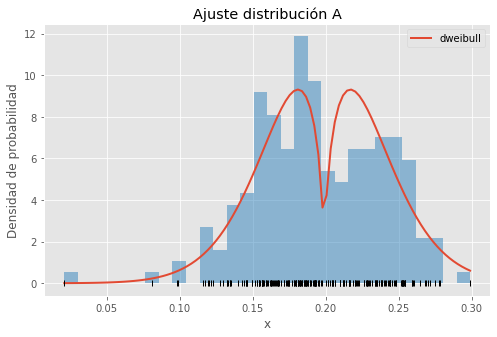

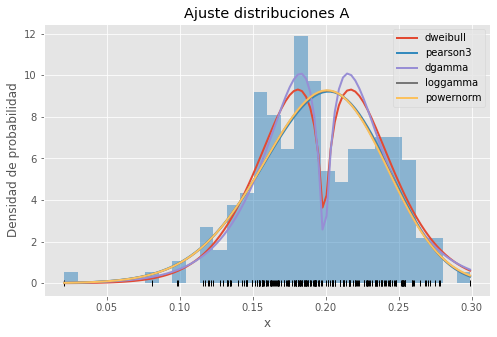

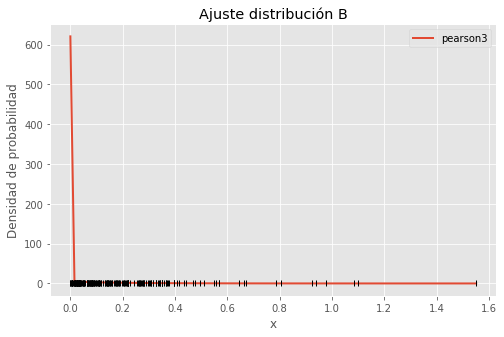

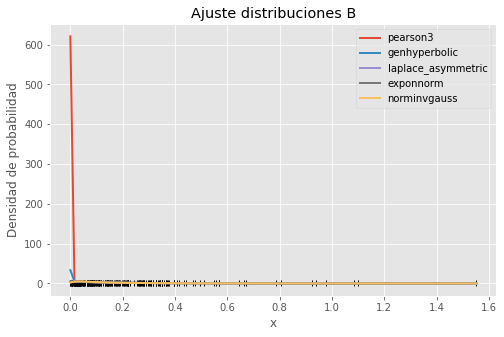

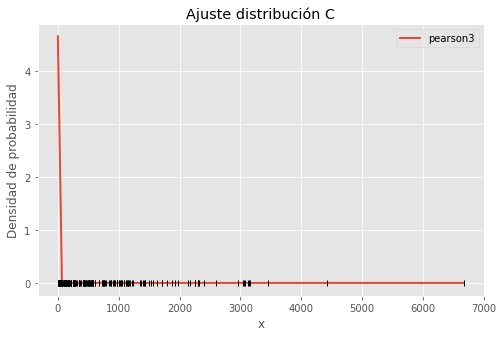

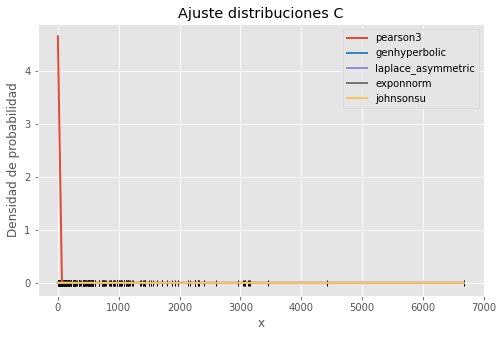

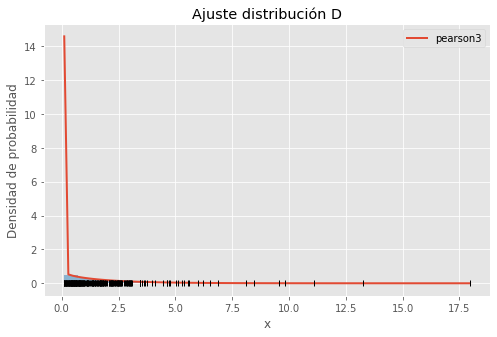

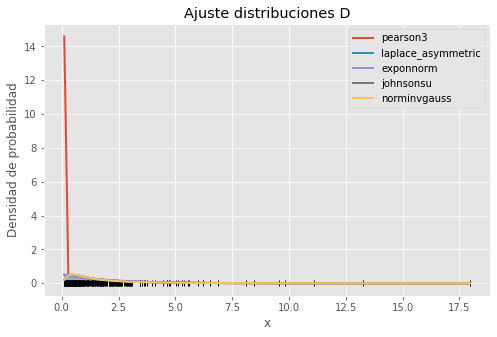

In [94]:
for dataset_aux in range(0,4):
  ac_distribuciones(datasets_all[dataset_aux], 5, letters[dataset_aux])